# Identifying Entities in Healthcare Data

## Workspace set up: Import and Install useful packages.

In [2]:
!pip install pycrf
!pip install sklearn-crfsuite
!pip install spacy


[notice] A new release of pip is available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [28]:
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")

## Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

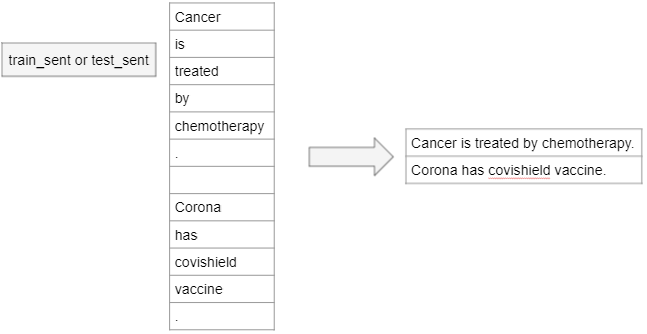

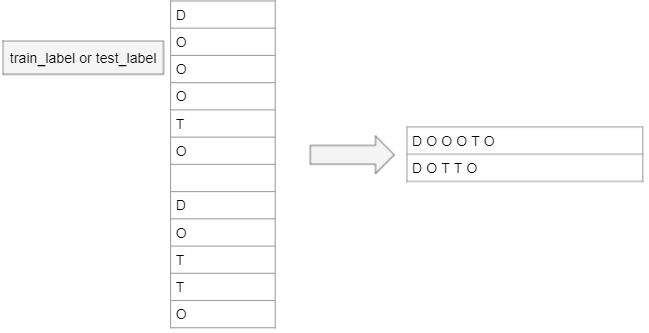

In [1]:
def convert_listofwords_to_listofsent(list):
    train_sent = []
    sent = ""
    for word in list:
        if word == "\n":
            train_sent.append(sent[:-1])
            sent = ""
        else:
            sent +=  word[:-1] + " "

    return train_sent

In [2]:
def convert_listofwords_to_listoflabel(list):
    train_label = []
    label = ""
    for word in list:
        if word == "\n":
            train_label.append(label[:-1])
            label = ""
        else:
            label +=  word[:-1] + " "

    return train_label

In [15]:
f = open('train_sent', "rt")
text = f.readlines()

train_sent = convert_listofwords_to_listofsent(text)

In [4]:
f = open('test_sent', "rt")
text = f.readlines()

test_sent = convert_listofwords_to_listofsent(text)

In [5]:
f = open('train_label', "rt")
text = f.readlines()

train_label = convert_listofwords_to_listoflabel(text)

In [6]:
f = open('test_label', "rt")
text = f.readlines()

test_label = convert_listofwords_to_listoflabel(text)

### Count the number of sentences in the processed train and test dataset 

In [7]:
print(f"# of Sentences:")
print(f"Train : {len(train_sent)}")
print(f"Test : {len(test_sent)}")

# of Sentences:
Train : 2599
Test : 1056


### Count the number of lines of labels in the processed train and test dataset.

In [8]:
print(f"# of Labels:")
print(f"Train : {len(train_label)}")
print(f"Test : {len(test_label)}")

# of Labels:
Train : 2599
Test : 1056


## Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [22]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [10]:
tokenized_sent = []
for sent in train_sent:
    tokenized_sent.append(sent_tokenize(sent))

In [26]:
train_pos = []
for sent in tokenized_sent:

    for i in sent:
     
        # Word tokenizers is used to find the words
        # and punctuation in a string
        wordsList = nltk.word_tokenize(i)
    
        # removing stop words from wordList
        #wordsList = [w for w in wordsList if not w in stop_words]
    
        #  Using a Tagger. Which is part-of-speech
        # tagger or POS-tagger.
        tagged = nltk.pos_tag(wordsList)
    
        train_pos.append(tagged)

In [27]:
train_pos

[[('All', 'DT'),
  ('live', 'JJ'),
  ('births', 'NNS'),
  ('>', 'VBP'),
  ('or', 'CC'),
  ('=', 'VBP'),
  ('23', 'CD'),
  ('weeks', 'NNS'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('University', 'NNP'),
  ('of', 'IN'),
  ('Vermont', 'NNP'),
  ('in', 'IN'),
  ('1995', 'CD'),
  ('(', '('),
  ('n', 'IN'),
  ('=', 'NNP'),
  ('2395', 'CD'),
  (')', ')'),
  ('were', 'VBD'),
  ('retrospectively', 'RB'),
  ('analyzed', 'VBN'),
  ('for', 'IN'),
  ('delivery', 'NN'),
  ('route', 'NN'),
  (',', ','),
  ('indication', 'NN'),
  ('for', 'IN'),
  ('cesarean', 'NN'),
  (',', ','),
  ('gestational', 'JJ'),
  ('age', 'NN'),
  (',', ','),
  ('parity', 'NN'),
  (',', ','),
  ('and', 'CC'),
  ('practice', 'NN'),
  ('group', 'NN'),
  ('(', '('),
  ('to', 'TO'),
  ('reflect', 'VB'),
  ('risk', 'NN'),
  ('status', 'NN'),
  (')', ')')],
 [('The', 'DT'),
  ('total', 'JJ'),
  ('cesarean', 'JJ'),
  ('rate', 'NN'),
  ('was', 'VBD'),
  ('14.4', 'CD'),
  ('%', 'NN'),
  ('(', '('),
  ('344', 'CD'),
  ('of', 'IN'),
  ('239

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

## Defining features for CRF





In [ ]:
# Let's define the features to get the feature value for one word.


## Getting the features

### Write a code/function to get the features for a sentence

In [ ]:
# Write a code to get features for a sentence.


### Write a code/function to get the labels of a sentence

In [ ]:
# Write a code to get the labels for a sentence.


## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

### Define the labels as the target variable for test and the train dataset

## Build the CRF Model

In [ ]:
# Build the CRF model.


## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

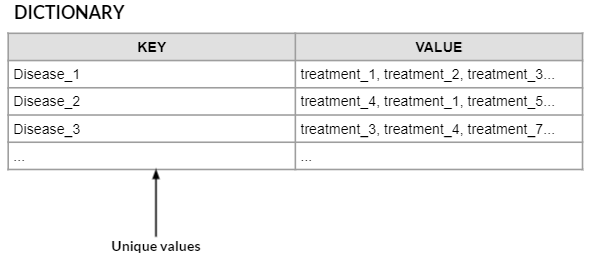

### Predict the treatment for the disease name: 'hereditary retinoblastoma'